### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2022-I


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---


Objetivo: En el presente trabajo se repasarán conceptos elementales respecto a optimización, aprendizaje profundo y regresión.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (3 puntos)**
- **No deben tener errores de redacción u ortografía. (2 puntos)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from pandas import read_csv, notnull
from numpy import sqrt
from numpy import vstack

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
import torch.nn.functional as F
from torch import nn
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_

ModuleNotFoundError: No module named 'pandas'

## Pregunta 1. Graficación

---

Para las siguientes:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


Realice lo siguiente (5 puntos):

En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función $𝑓_{1}$ y  $𝑓_{2}$. 

In [4]:
%matplotlib inline
import numpy as np
from math import e
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
from plotly import graph_objects as go
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Se define el estilo del grafico.

plt.style.use('ggplot')


#Se crean las funciones solicitadas en la especificacion.

def f1(x, y):
    return (x-0.7)**2+(y-0.5)**2

def f2(x,y):
    return x*e**((-x**2)-(y)**2)

#Funcion que grafica una funcion matematica.
#Entrada: Funcion matematica.
#Salida: Grafico de la funcion.
def graficar(funcion):
    x = y = np.arange(-3.0, 3.0, 0.05)
    X, Y = np.meshgrid(x, y)
    zs = np.array([funcion(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    plt.clf()
    fig = plt.figure()
    ax = plt.subplot(projection='3d')
    surf = ax.plot_surface(X, Y, Z,cmap='inferno' )
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")AttributeError: module 'plotly.graph_objs' has no attribute 'FigureWidget'
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

graficar(f1)
graficar(f2)


SyntaxError: invalid syntax (<ipython-input-4-bc07bd2cd29c>, line 38)

## Pregunta 2. Optimización
---

**a) Vector gradiente  (5 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$. Además, evalúelo en $\begin{bmatrix}1\\1\end{bmatrix}$ y $\begin{bmatrix}-1\\-1\end{bmatrix}$. 

--No se require programación en python--.

 - $f_3(x,y) = x^4+y^3+5x^2y^3$
 


Para calcular el vector gradiente de una función primero se realiza el cálculo de la derivada en cada uno de los elementos, como la función son sumas, se separan las derivadas para cada elemento de la suma. Derivando la funcion en ***x*** y en ***y***.

$$f_x =  \frac{d}{dx}(x^4+y^3+5x^2y^3)  =  \frac{d}{dx}(x^4)+\frac{d}{dx}(y^3)+\frac{d}{dx}(5x^2y^3)= 4x + 10xy^3$$
 
---

$$f_y =  \frac{d}{dy}(x^4+y^3+5x^2y^3)=  \frac{d}{dy}(x^4)+\frac{d}{dy}(y^3)+\frac{d}{dy}(5x^2y^3)= (15x^2 + 3)y^2 = 3y^2 + 15x^2y^2$$

---

Por lo tanto el vector gradiente es el siguiente: $$\begin{bmatrix}4x + 10xy^3\\3y^2 + 15x^2y^2\end{bmatrix}$$

Evaluado en $\begin{bmatrix}1\\1\end{bmatrix}$ quedaría de la siguiente manera:
$$\begin{bmatrix}4(1) + 10(1)(1)^3 = 14\\3(1)^2 + 15(1)^2(1)^2 = 18\end{bmatrix} = \begin{bmatrix}14\\18\end{bmatrix}$$

Evaluado en $\begin{bmatrix}-1\\-1\end{bmatrix}$ quedaría de la siguiente manera:
$$\begin{bmatrix}4(-1) + 10(-1)(-1)^3 = 6 \\ 3(-1)^2 + 15(-1)^2(-1)^2 = 18\end{bmatrix} = \begin{bmatrix}6\\18\end{bmatrix}$$

**b) Descenso de gradiente (10 puntos)**

**Sea la función:** 

\begin{equation}
f_4\left(\overrightarrow{x}\right)=(x-0.7)^{2}+(y-0.5)^{2},
\end{equation}


**Implemente el algoritmo de descenso de gradiente para $f_4(x)$ en la función en Python denominada: (8 puntos)**

$$funcion\_gradient\_descent \left(learning\_rate, max\_iters, starting\_point, f\_function,f\_gradient, precision\right)$$

donde los parámetros corresponden a:

* learning_rate: tasa_aprendizaje o el $\alpha$
* max_iters: es el máximo número de iteraciones a ejecutar
* starting_point: es el vector con los dos valores iniciales [x,y]
* f_function: fución a optimizar
* f_gradient: gradiente de la función a optimizar.
* precision: es el valor mínimo para un cambio entre iteración. 

Despliegue y analice los resultados (2 puntos).


Los valores que se obtienen son: 0.6999999623536759 0.5000000163035262 en pasos 87


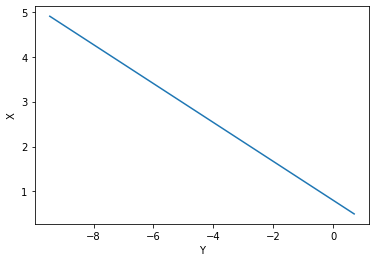

In [5]:

def funcion_gradient_descent(tasa_aprendizaje,iteraciones,xy,tolerancia):
    # Proceso iterativo
    x = xy[0]
    y = xy[1]
    resultados_x = []
    resultados_y = []
    for paso in range(0, iteraciones):
        x_gradiente = (10*x - 7)/5  #derivada de la funcion en x
        y_gradiente = 2*y-1 #derivada de la funcion en y
        x = x - (tasa_aprendizaje * x_gradiente)
        y = y - (tasa_aprendizaje * y_gradiente)
        resultados_x.append(x)
        resultados_y.append(y)
        if max(abs(tasa_aprendizaje * x_gradiente), abs(tasa_aprendizaje * y_gradiente)) < tolerancia:
            break

    # Impresión de los resultados
    print("Los valores que se obtienen son:", x, y, "en pasos", paso)
    
    plt.plot(resultados_x,resultados_y)
    plt.ylabel('X')
    plt.xlabel('Y')
    plt.show()
    
    
funcion_gradient_descent(0.10,100,[-12,6],1e-8)

Los valores que se obtienen son: 0.6999999959577566 0.5000000017505778 en pasos 97


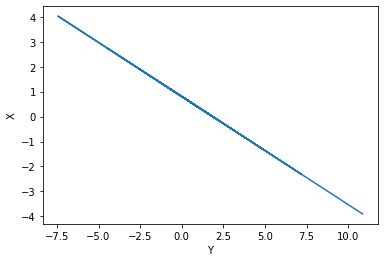

In [6]:
funcion_gradient_descent(0.9,100,[-12,6],1e-8)

Como se puede ver, si se dan pasos agigantados van a ver veces que la linea se va a regresar, en este caso se aprecia que con 0.9 de tasa de aprendizaje comparado con 0.1. El algoritmo pasa muchas veces por donde ya pasó dando a ver que la línea es "más gruesa", pero en realidad es que se dibujo varias veces en un mismo sector.

## Pregunta 3. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

(requisito indispensable para tomar en cuenta el ejercicio, deben usar PyTorch).
- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (3 puntos) Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.
- d) (5 puntos) Defina el modelo utilizando un perceptrón multicapa implementado con PyTorch.
- e) (5 puntos) Realice el entrenamiento del modelo.
- f) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- g) (2 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- h) (5 puntos) Realice al menos tres conclusiones sobre el ejercicio.


In [ ]:
class CSVDataset(Dataset):
    def __init__(self, path):
        df = read_csv(path, header=0)
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]


    def get_splits(self, n_test=0.33):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])

    
def prepare_data(path):
    dataset = CSVDataset(path)
    train, test = dataset.get_splits()
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl


def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    return mse


def predict(row, model):
    row = Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat

a) 
Los datos describen la morfologia de una especie de molusco llamados abulones, los datos pretenden relacionar y predecir la edad de los abulones en base en los anillos que tienen,
los datos que tenemos son el largo del abulon, el diametro el cual es la medida perpendicular al largo, la altura del abulon, el peso completo del abulon, el peso de la tripa (una vez extraida la sangre), el peso de la concha(una vez secado),  por ultimo tenemos los anillos 
[Fuente](https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset?datasetId=37691)


In [ ]:
#b)
df1 = pd.read_csv('./datos/abalone.csv', index_col=0)
df1.head()


,Diameter,Height,Whole,Viscera,Shellweight,Rings
Length,,,,,,
0.745,0.585,0.215,2.4990,0.4720,0.700,17
0.740,0.600,0.195,1.9740,0.4085,0.710,16
0.735,0.590,0.225,1.7560,0.3405,0.580,21
0.730,0.595,0.230,2.8255,0.4190,0.897,17
0.725,0.560,0.210,2.1410,0.3980,1.005,18


         Diameter      Height       Whole     Viscera  Shellweight  \
count  987.000000  987.000000  987.000000  987.000000   987.000000   
mean     0.383678    0.133131    0.712899    0.155166     0.218105   
std      0.101893    0.039270    0.454114    0.097596     0.144131   
min      0.055000    0.010000    0.002000    0.000500     0.001500   
25%      0.322500    0.105000    0.354500    0.074000     0.105000   
50%      0.400000    0.135000    0.663000    0.146000     0.200000   
75%      0.455000    0.160000    0.996500    0.220250     0.305000   
max      0.600000    0.240000    2.825500    0.541000     1.005000   

             Rings  
count   987.000000  
mean     19.567376  
std     290.580810  
min   -1300.000000  
25%       8.000000  
50%      10.000000  
75%      13.000000  
max    9000.000000  


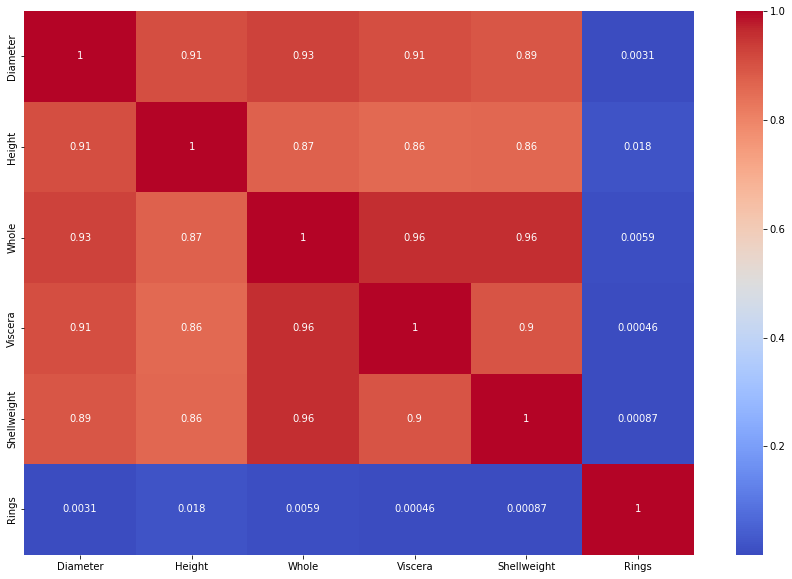

In [ ]:
# c)

#  # limpieza de datos 
#df1 = df1[pd.notnull(df1['Length'])]
df1 = df1[pd.notnull(df1['Diameter'])]
df1 = df1[pd.notnull(df1['Height'])]
df1 = df1[pd.notnull(df1['Whole'])]
df1 = df1[pd.notnull(df1['Viscera'])]
df1 = df1[pd.notnull(df1['Shellweight'])]
df1 = df1[pd.notnull(df1['Rings'])]

#df1= df1[df1['Length'] != 0]
df1= df1[df1['Diameter'] != 0]
df1= df1[df1['Height'] != 0]
df1= df1[df1['Whole'] != 0]
df1= df1[df1['Viscera'] != 0]
df1= df1[df1['Shellweight'] != 0]



# a = df1.loc[~df1.index.duplicated(), :]# eliminamos los indices repetidos
# print(a)



def statistics(data):
    stat = data.describe()
    print(stat)



def mapaCalor(df1):
    _,ax=plt.subplots(figsize=(15,10))
    #colormap=sns.diverging_palette(115,255,as_cmap=True)
    sns.heatmap(abs(df1.corr()),annot=True,cmap="coolwarm")

statistics(df1)

mapaCalor(df1)

In [ ]:
#d)
class MLP(nn.Module):
    def __init__(self, n_inputs=6, n_output=1):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        self.hidden3 = Linear(8, n_output)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        return X
        

model = MLP()
print (model)



MLP(
  (hidden1): Linear(in_features=6, out_features=10, bias=True)
  (act1): Sigmoid()
  (hidden2): Linear(in_features=10, out_features=8, bias=True)
  (act2): Sigmoid()
  (hidden3): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
#e)
def train_model(train_dl, model):
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(100):
        for i, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()


path = 'datos\Abalone.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
print(train_dl)
train_model(train_dl, model)

661 326


In [ ]:
#f)
mse = evaluate_model(test_dl, model)
print('Error Cuadratico Medio: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

Error Cuadratico Medio: 5346.612, RMSE: 73.121


In [ ]:
#g)
row = [0.74,0.6,0.612,2.974,0.4085,0.44]
yhat = predict(row, model)
print('Predicted: %.3f' % yhat)

Predicted: 15.510


h)

1. Calcular el error nos da un muy buen panorama del estado del MLP. 

2. Gracias a esto podemos buscar como mejorar los resultados, ejemplo: cambiando la funcion de activacion en vez de utilizar sigmoid() como en este caso, utilizar ReLU() puede mejorar tanto el tiempo como reducir el margen de error

3. Hacer que la MLP aprenda con los datos aumenta enormemente la precision del output de la red, sin embargo una mayor cantidad de datos no necesariamente significa que la precision va a umentar 


## Pregunta 4. Ajuste de curvas con mínimos cuadrados.
(requisito indispensable para tomar en cuenta el ejercicio, deben usar tensores de PyTorch).
- a) (5 puntos) Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones. 
- b) (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.
- c) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- d) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

## Pregunta 5. Implemente un perceptrón de una capa 

(requisito indispensable para tomar en cuenta el ejercicio, deben usar tensores de PyTorch).

- a)(10 puntos) Implemente el algoritmo del perceptrón de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir en PyTorch no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.
- b)(5 puntos) Utilice el perceptrón desarrollado en a) para realizar regresión con los datos de los abulones.
- c) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.